In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import important libraries

In [2]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import warnings
from scipy.stats import norm
import pickle

# Read preprocessed train data

In [19]:
X_train_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/X_train_not_churned')
y_train_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/y_train_not_churned')['target_actual_profit']

# Read preprocessed test data

In [20]:
X_test_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/X_test_not_churned')
y_test_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/y_test_not_churned')['target_actual_profit']

# Create regression evaluation class

In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
class RegressionEvaluation:
    def __init__(self, y_test, y_pred):
        self.y_test = y_test
        self.y_pred = y_pred

    def r2(self):
        return r2_score(self.y_test, self.y_pred)

    def mean_absolute_error(self):
        return mean_absolute_error(self.y_test, self.y_pred)

    def mean_squared_error(self):
        return mean_squared_error(self.y_test, self.y_pred)

    def root_mean_squared_error(self):
        return np.sqrt(self.mean_squared_error())

    def residuals_plot(self):
        residuals = self.y_test - self.y_pred
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_pred, y=residuals)
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Predicted Values')
        plt.show()

    def predictions_vs_actual_plot(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, self.y_pred, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()],
                 [self.y_test.min(), self.y_test.max()],
                 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Predictions vs Actual Values')
        plt.show()

    def summary(self):
        print("R² Score:", self.r2())
        print("Mean Absolute Error:", self.mean_absolute_error())
        print("Mean Squared Error:", self.mean_squared_error())
        print("Root Mean Squared Error:", self.root_mean_squared_error())

---
# ***Random Forest Regression***
---

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Initialize random forest model

In [39]:
forest = RandomForestRegressor(random_state = 42, max_depth=20, n_estimators=150)

# Fit the model

In [40]:
forest.fit(X_train_not_churned, y_train_not_churned)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

# Create random forest evaluation object

In [41]:
forest_evaluation = RegressionEvaluation(y_test_not_churned, forest.predict(X_test_not_churned))

# Evaluate the modelfrom different corner

In [42]:
forest_evaluation.summary()

R² Score: 0.68187308943503
Mean Absolute Error: 1.122824566737524
Mean Squared Error: 11.253947882708315
Root Mean Squared Error: 3.354690430234706


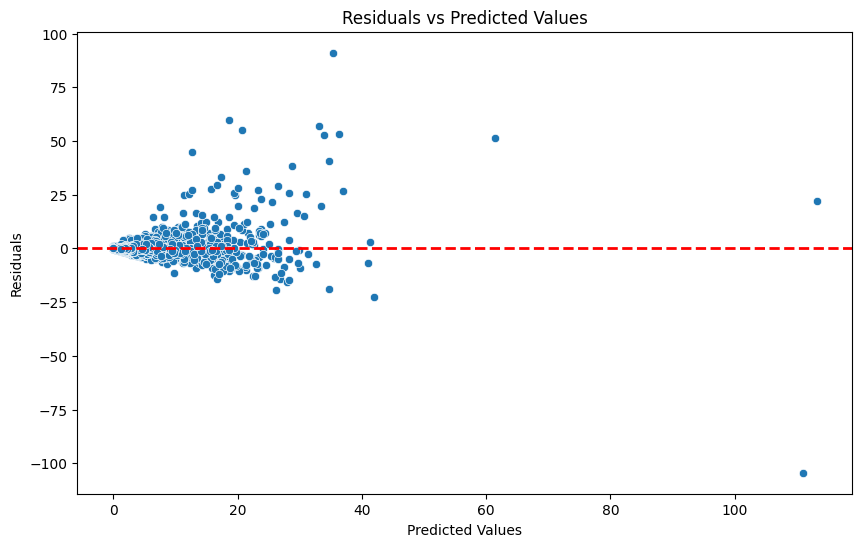

In [43]:
forest_evaluation.residuals_plot()

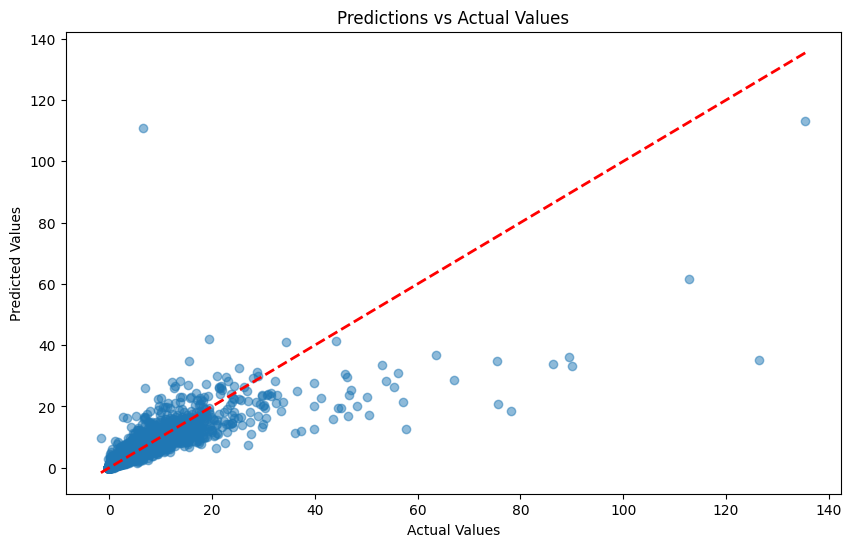

In [44]:
forest_evaluation.predictions_vs_actual_plot()

In [45]:
with open('/content/drive/MyDrive/Churn Prediction/forest_profit_model.pkl', 'wb') as f:
    pickle.dump(forest, f)